In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [36]:
pca = PCA(n_components=3)
X = faces.data
W = pca.fit_transform(X)
X_inv = pca.inverse_transform(W)

print(f"각 차원의 설명 정도: {pca.explained_variance_ratio_}")

각 차원의 설명 정도: [0.23812726 0.13993965 0.07968613]


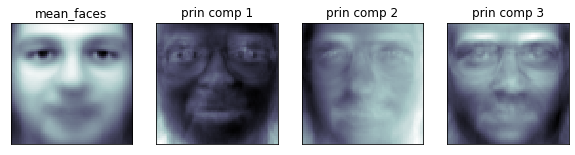

In [39]:
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)
face_p3 = pca.components_[2].reshape(64, 64)

plt.figure(figsize=(10,10))
plt.subplot(141)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("mean_faces")

plt.subplot(142)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("prin comp 1")

plt.subplot(143)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("prin comp 2")

plt.subplot(144)
plt.imshow(face_p3, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("prin comp 3")

plt.show()

In [47]:
def plot_face_with_subplot(subplot_coords, data, title):
    plt.subplot(subplot_coords)
    plt.imshow(data, cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

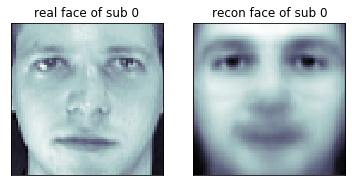

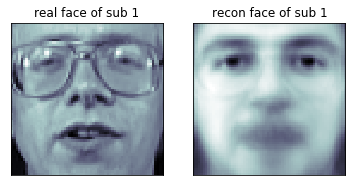

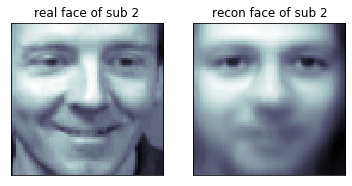

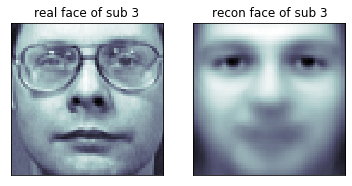

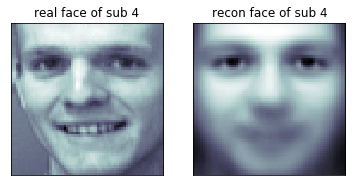

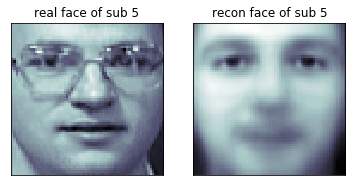

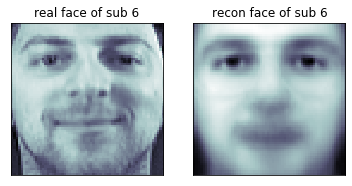

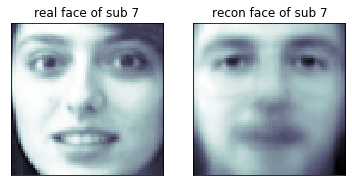

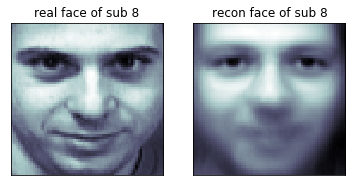

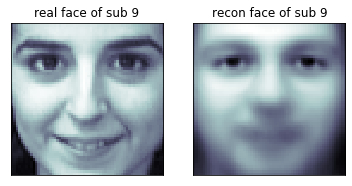

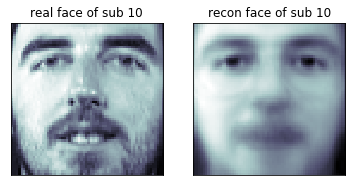

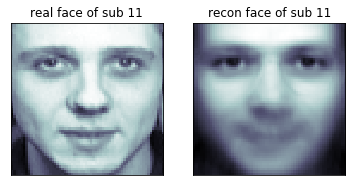

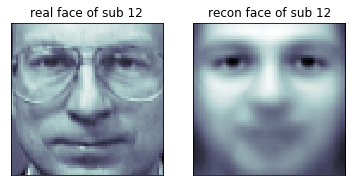

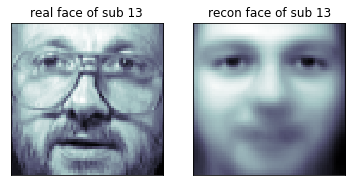

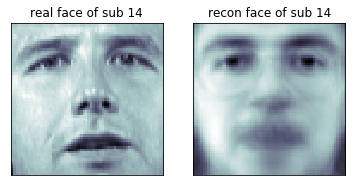

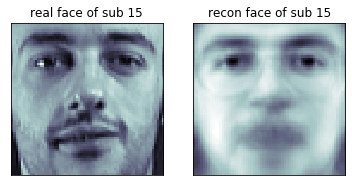

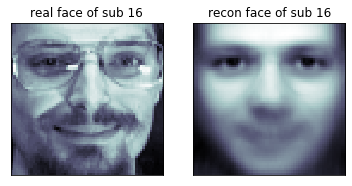

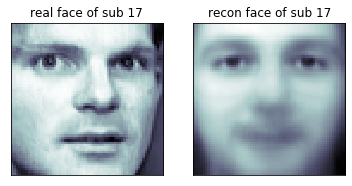

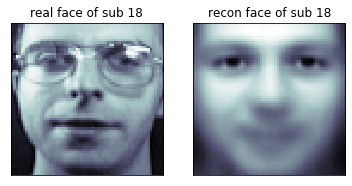

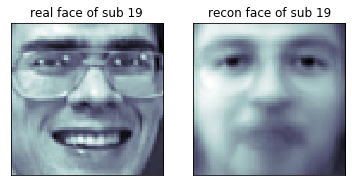

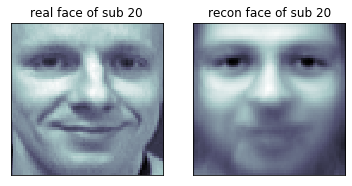

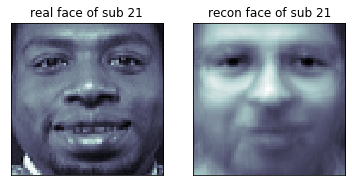

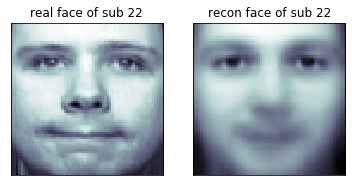

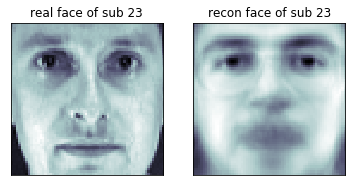

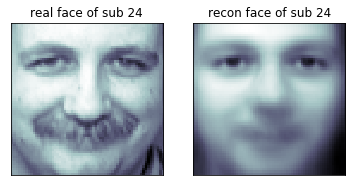

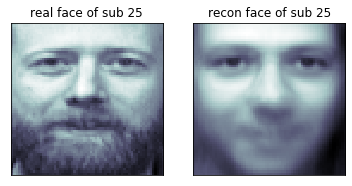

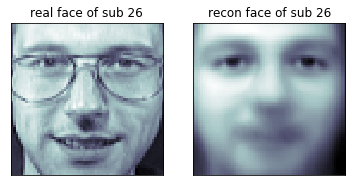

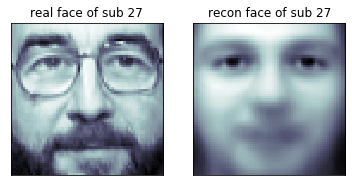

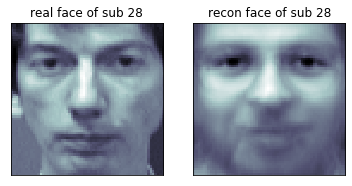

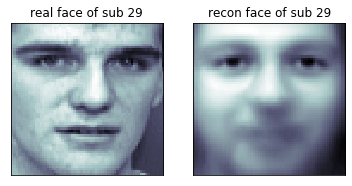

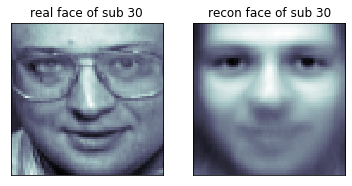

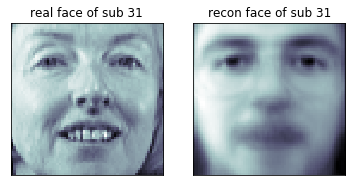

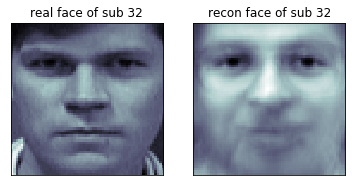

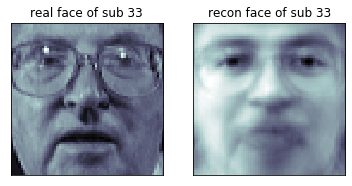

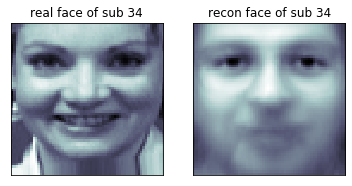

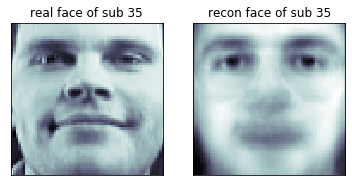

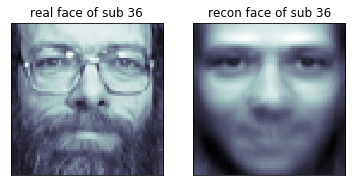

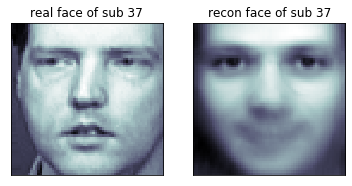

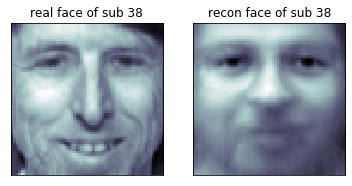

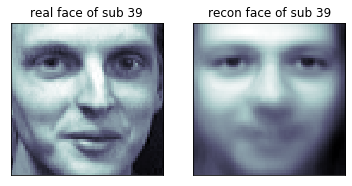

In [51]:
real_face = []
recon_face = []

for sub in range(0, 400, 10):
    real_face.append(X[sub].reshape(64, 64))
    recon_face.append(X_inv[sub].reshape(64, 64))



for idx in range(len(real_face)):
    plt.figure(figsize=(6, 6))
    plot_face_with_subplot(121, real_face[idx], "real face of sub " + str(idx))
    plot_face_with_subplot(122, recon_face[idx], "recon face of sub " + str(idx))
    plt.show()
